<a href="https://colab.research.google.com/github/AyHaski/DataScienceSS20Project/blob/master/Just_Bert.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [21]:
!git clone https://github.com/AyHaski/DataScienceSS20Project
!pip install tensorflow==2.0
!pip install tensorflow_hub
!pip install bert-for-tf2
!pip install sentencepiece

fatal: destination path 'DataScienceSS20Project' already exists and is not an empty directory.
  Using cached https://files.pythonhosted.org/packages/46/0f/7bd55361168bb32796b360ad15a25de6966c9c1beb58a8e30c01c8279862/tensorflow-2.0.0-cp36-cp36m-manylinux2010_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/4e/35/11749bf99b2d4e3cceb4d55ca22590b0d7c2c62b9de38ac4a4a7f4687421/gast-0.2.2.tar.gz
  Using cached https://files.pythonhosted.org/packages/76/54/99b9d5d52d5cb732f099baaaf7740403e83fe6b0cedde940fabd2b13d75a/tensorboard-2.0.2-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/fc/08/8b927337b7019c374719145d1dceba21a8bb909b93b1ad6f8fb7d22c1ca1/tensorflow_estimator-2.0.1-py2.py3-none-any.whl
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=da1468d3de58932aa1cab24ac2097e2b48fcad2b71c43600158a63a94b40163e
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successful

In [22]:
#imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
from nltk.corpus import stopwords
import matplotlib as mpl
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import tensorflow_hub as hub
import tensorflow as tf
import bert
from tensorflow.keras.models import Model
import math
import nltk

nltk.download("popular")
mpl.style.use("seaborn")
STOP = stopwords.words('english')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

DATA CLEANING

In [0]:
train = pd.read_csv('/content/DataScienceSS20Project/nlp-getting-started/train.csv', dtype={'id': np.int16, 'target': np.int8})
test = pd.read_csv('/content/DataScienceSS20Project/nlp-getting-started/test.csv', dtype={'id': np.int16})

In [0]:
#Data Cleaning
#all to lower case
#remove punctiaction and other characters etc
#remove Stop words

def clean_data(x):
  x= x.lower()
  x = re.sub('https?://\S+|www\.\S+', '', x)
  x = re.sub("'", " ", x)
  x = re.sub(r"&gt;", "", x)
  x = re.sub(r"&lt;", "", x)
  x = re.sub(r"&amp;", "", x)
  x = re.sub(r"\n", " ", x)
  x = re.sub(r"\x89ûò", "", x)
  x = re.sub(r"\x89ûò", "", x)
  x = re.sub(r"\x89ûª", "", x)
  x = re.sub(r"åê", "", x)
  x = re.sub(r"\x89ûï", "", x)
  x = re.sub(r"\x89ûò", "", x)
  x = re.sub(r"\x89ûª", "", x)
  x = re.sub(r"\x89ûò", "", x)
  x = re.sub(r"\x89ûª", "", x)
  x = re.sub(r"\x89û", "", x)
  x = re.sub(r"\x9d", "", x)
  x = re.sub('\w*\d\w*', '', x)
  x = re.sub('ì©', 'é', x)
  x = re.sub("[@.!?\\-*#+_:,;=><'§$%&/°^`´{}>|~()]", "",x)
  return x

train['text']=train['text'].apply(lambda x: clean_data(x))
test['text']=test['text'].apply(lambda x: clean_data(x))

In [25]:
train['text'].values[:10]
test['text'].values[:10]

array(['just happened a terrible car crash',
       'heard about earthquake is different cities stay safe everyone',
       'there is a forest fire at spot pond geese are fleeing across the street i cannot save them all',
       'apocalypse lighting spokane wildfires',
       'typhoon soudelor kills  in china and taiwan',
       'we re shakingit s an earthquake',
       'they d probably still show more life than arsenal did yesterday eh eh',
       'hey how are you', 'what a nice hat', 'fuck off'], dtype=object)

In [0]:
tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')

train['text'] = train['text'].apply(lambda x: tokenizer.tokenize(x))
test['text'] = test['text'].apply(lambda x: tokenizer.tokenize(x))

In [0]:
def remove_stopwords(tokens):
  toke=[]
  for t in tokens: 
    if t not in STOP:
       toke.append(t)
  return toke

train['text'] = train['text'].apply(lambda x: remove_stopwords(x))
test['text'] = test['text'].apply(lambda x: remove_stopwords(x))

In [28]:
def combine_tokens(tokens):
  a=""
  for t in tokens:
    a = a + t + " "
  return a

  
train['text'] = train['text'].apply(lambda x: combine_tokens(x))
test['text'] = test['text'].apply(lambda x: combine_tokens(x))
train['text'].head()

0        deeds reason earthquake may allah forgive us 
1               forest fire near la ronge sask canada 
2    residents asked shelter place notified officer...
3    people receive wildfires evacuation orders cal...
4    got sent photo ruby alaska smoke wildfires pou...
Name: text, dtype: object

BERT Model Here

In [29]:
max_seq_length = 160  
input_word_ids = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32,
                                       name="input_word_ids")
input_mask = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32,
                                   name="input_mask")
segment_ids = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32,
                                    name="segment_ids")
bert_layer = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/1",
                            trainable=True)
pooled_output, sequence_output = bert_layer([input_word_ids, input_mask, segment_ids])
clf_output = sequence_output[:, 0, :]

x = tf.keras.layers.Dropout(0.1)(clf_output)
out = tf.keras.layers.Dense(1, activation='sigmoid')(x)
#out = tf.keras.layers.Dense(1, activation='sigmoid')(clf_output)

model = Model(inputs=[input_word_ids, input_mask, segment_ids], outputs=out)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_word_ids (InputLayer)     [(None, 160)]        0                                            
__________________________________________________________________________________________________
input_mask (InputLayer)         [(None, 160)]        0                                            
__________________________________________________________________________________________________
segment_ids (InputLayer)        [(None, 160)]        0                                            
__________________________________________________________________________________________________
keras_layer_1 (KerasLayer)      [(None, 768), (None, 109482241   input_word_ids[0][0]             
                                                                 input_mask[0][0]           

In [0]:
FullTokenizer = bert.bert_tokenization.FullTokenizer
vocab_file = bert_layer.resolved_object.vocab_file.asset_path.numpy()
do_lower_case = bert_layer.resolved_object.do_lower_case.numpy()
tokenizer = FullTokenizer(vocab_file, do_lower_case)

In [0]:
# from https://www.kaggle.com/gunesevitan/nlp-with-disaster-tweets-eda-cleaning-and-bert#7.-Model
def bert_encode(texts, tokenizer, max_len=512):
    all_tokens = []
    all_masks = []
    all_segments = []
    
    for text in texts:
        text = tokenizer.tokenize(text)
            
        text = text[:max_len-2]
        input_sequence = ["[CLS]"] + text + ["[SEP]"]
        pad_len = max_len - len(input_sequence)
        
        tokens = tokenizer.convert_tokens_to_ids(input_sequence)
        tokens += [0] * pad_len
        pad_masks = [1] * len(input_sequence) + [0] * pad_len
        segment_ids = [0] * max_len
        
        all_tokens.append(tokens)
        all_masks.append(pad_masks)
        all_segments.append(segment_ids)
    return np.array(all_tokens), np.array(all_masks), np.array(all_segments)

In [0]:
train_input = bert_encode(train.text.values, tokenizer, max_len=max_seq_length)
test_input = bert_encode(test.text.values, tokenizer, max_len=max_seq_length)
train_labels = train.target.values

In [33]:
checkpoint =  tf.keras.callbacks.ModelCheckpoint('model.h5', monitor='val_loss', save_best_only=True)

optimizer = tf.keras.optimizers.Adam(lr=0.000001)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
history=model.fit(
    train_input, train_labels,
    validation_split=0.2,
    callbacks=[checkpoint],
    epochs=5,
    batch_size=32
)

Epoch 1/5
191/191 [==============================] - 125s 654ms/step - loss: 0.4679 - accuracy: 0.7824 - val_loss: 0.3939 - val_accuracy: 0.8207
Epoch 2/5
191/191 [==============================] - 119s 625ms/step - loss: 0.3067 - accuracy: 0.8724 - val_loss: 0.4446 - val_accuracy: 0.8089
Epoch 3/5
191/191 [==============================] - 119s 625ms/step - loss: 0.1753 - accuracy: 0.9348 - val_loss: 0.5105 - val_accuracy: 0.8181
Epoch 4/5
191/191 [==============================] - 119s 625ms/step - loss: 0.0867 - accuracy: 0.9696 - val_loss: 0.5767 - val_accuracy: 0.8070
Epoch 5/5
191/191 [==============================] - 119s 625ms/step - loss: 0.0606 - accuracy: 0.9765 - val_loss: 0.7089 - val_accuracy: 0.7991


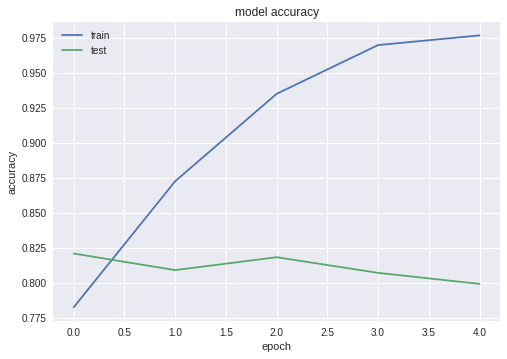

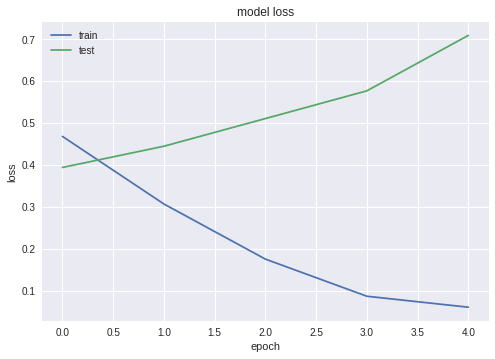

In [34]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
submission = pd.read_csv('/content/DataScienceSS20Project/nlp-getting-started/sample_submission.csv')

In [0]:
model.trainable=False

optimizer = tf.keras.optimizers.Adam(lr=0.00001)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
model.load_weights('model.h5')
train_pred = model.predict(test_input)


In [0]:
submission['target'] = train_pred.round().astype(int)
submission.to_csv('submission.csv', index=False)